In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import bmi_lstm
from pathlib import Path
from netCDF4 import Dataset

#This is the outdated specific lstm.
import bmi_lstm_nwm3_aorc

In [2]:
model = bmi_lstm.bmi_LSTM()
model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))

thank you for choosing LSTM


/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:108: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)
/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:187: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)


In [3]:
with open(Path(model.cfg_train['run_dir'] / 'test/model_epoch001' / 'test_results.p'), 'rb') as fb:
    test_results = pickle.load(fb)

In [4]:
test_results.keys()

dict_keys(['01022500', '01547700', '02064000', '03015500'])

In [5]:
test_results['01022500']['1H']['xr']

<xarray.Dataset>
Dimensions:               (date: 17520, time_step: 1)
Coordinates:
  * date                  (date) datetime64[ns] 2001-01-01 ... 2002-12-31T23:00:00
  * time_step             (time_step) int64 0
Data variables:
    qobs_mm_per_hour_obs  (date, time_step) float64 nan nan nan ... nan nan nan
    qobs_mm_per_hour_sim  (date, time_step) float64 0.1013 0.1011 ... 0.09974

In [6]:
input_data = Dataset(Path(model.cfg_train['run_dir'] / 'test_data/usgs-streamflow-nldas_hourly.nc'), 'r')

In [7]:
input_data['date']

<class 'netCDF4._netCDF4.Variable'>
int64 date(date)
    units: hours since 2000-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (26304,)
filling on, default _FillValue of -9223372036854775806 used

In [8]:
len(list(input_data['temperature'][0].data))

26304

In [9]:
runoff_output_list = []

for temp, precip in zip(list(input_data['total_precipitation'][0].data),
                        list(input_data['temperature'][0].data)):
    model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',precip)
    model.set_value('land_surface_air__temperature',temp)

    model.update()

    runoff_output_list.append(model.streamflow)

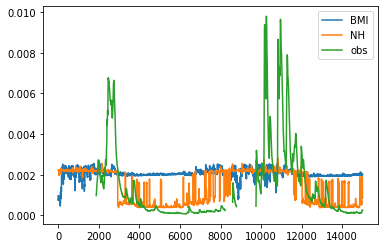

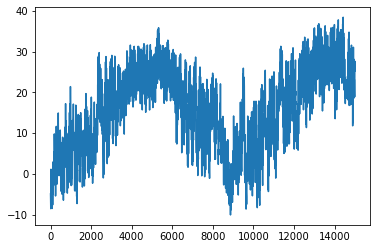

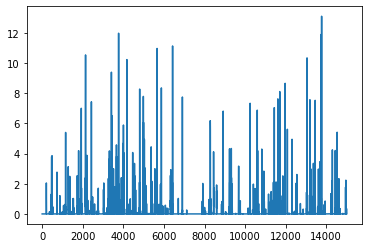

In [10]:
start_plot = 365*24
n_plot = 15000
plt.plot(runoff_output_list[start_plot:start_plot+n_plot], label='BMI')
plt.plot(test_results['01022500']['1H']['xr'].qobs_mm_per_hour_sim[:n_plot] * model.output_factor, label='NH')
plt.plot(test_results['01022500']['1H']['xr'].qobs_mm_per_hour_obs[:n_plot] * model.output_factor, label='obs')
plt.legend()
plt.show()
plt.close()
plt.plot(list(input_data['temperature'][0].data[start_plot:start_plot+n_plot]))
plt.show()
plt.close()
plt.plot(list(input_data['total_precipitation'][0].data[start_plot:start_plot+n_plot]))

thank you for choosing LSTM


/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:108: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)
/glade/work/jframe/alt-modular-lstm-cleanup/alt-modular/Modules/LSTM/bmi_lstm.py:187: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(fp)


thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM
thank you for choosing LSTM


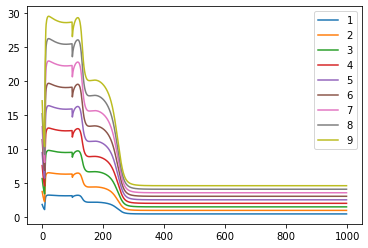

In [11]:
# Some silly test of the basin area...

for area_sqkm in list(range(1,10)):
    
    model = bmi_lstm.bmi_LSTM()
    model.initialize(bmi_cfg_file=Path('lstm_bmi_config.yml'))
    
    # This is fake, this is really taked care of in initiallize
    model.output_factor =  area_sqkm * 35.315 # from m3/s to ft3/s
    
    runoff_output_list = []
    model.set_value('land_surface_air__temperature',25)
    for i in range(1,1000):

        if i in list(range(10,100)):
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',5)
        else:
            model.set_value('atmosphere_water__liquid_equivalent_precipitation_rate',0)

        model.update()

        runoff_output_list.append(model.streamflow)
        
    plt.plot(runoff_output_list, label=area_sqkm)
    plt.legend()
plt.show()
plt.close()

# Old stuff Below...

In [12]:
model_lstm_nwm3_aorc = bmi_lstm_nwm3_aorc.bmi_LSTM()
model_lstm_nwm3_aorc.read_cfg_file('lstm-info.cfg')

In [13]:
model_lstm_nwm3_aorc.initialize()

In [14]:
model_lstm_nwm3_aorc.input_tensor.shape

torch.Size([2492, 11])

In [15]:
model_lstm_nwm3_aorc.update()

updating for t:  1772
start_this_seq 1771
for time: 1773 lstm output: 26.464825059931275


In [16]:
model_lstm_nwm3_aorc.input_tensor.shape

torch.Size([2492, 11])

In [17]:
model_lstm_nwm3_aorc.update_until(model_lstm_nwm3_aorc.iend)

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 20.112555098483824
updating for t:  1774
start_this_seq 1773
for time: 1775 lstm output: 16.852312281650512
updating for t:  1775
start_this_seq 1774
for time: 1776 lstm output: 14.78169671249273
updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 13.18190545875549
updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 12.08279310799716
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 11.01406926653117
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 9.938357575039204
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 9.656570041522016
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 9.124591010730807
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 8.506807724689041
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 8.548604331064814
updating for t:  1784
start_th

for time: 2013 lstm output: 3.1214801321304058
updating for t:  2013
start_this_seq 2012
for time: 2014 lstm output: 2.9216904789548352
updating for t:  2014
start_this_seq 2013
for time: 2015 lstm output: 2.9360227394762846
updating for t:  2015
start_this_seq 2014
for time: 2016 lstm output: 2.6122989161004257
updating for t:  2016
start_this_seq 2015
for time: 2017 lstm output: 2.9889627794942153
updating for t:  2017
start_this_seq 2016
for time: 2018 lstm output: 2.489055811552365
updating for t:  2018
start_this_seq 2017
for time: 2019 lstm output: 2.6386035214585926
updating for t:  2019
start_this_seq 2018
for time: 2020 lstm output: 2.3247494389137398
updating for t:  2020
start_this_seq 2019
for time: 2021 lstm output: 2.7991071950694058
updating for t:  2021
start_this_seq 2020
for time: 2022 lstm output: 2.187762214824848
updating for t:  2022
start_this_seq 2021
for time: 2023 lstm output: 2.709943184467063
updating for t:  2023
start_this_seq 2022
for time: 2024 lstm outp

for time: 2302 lstm output: 152.44020653725693
updating for t:  2302
start_this_seq 2301
for time: 2303 lstm output: 137.04985098462578
updating for t:  2303
start_this_seq 2302
for time: 2304 lstm output: 126.19079821012154
updating for t:  2304
start_this_seq 2303
for time: 2305 lstm output: 117.3843868650252
updating for t:  2305
start_this_seq 2304
for time: 2306 lstm output: 109.90420402417476
updating for t:  2306
start_this_seq 2305
for time: 2307 lstm output: 103.4389613700533
updating for t:  2307
start_this_seq 2306
for time: 2308 lstm output: 97.78495627402359
updating for t:  2308
start_this_seq 2307
for time: 2309 lstm output: 93.02206563301586
updating for t:  2309
start_this_seq 2308
for time: 2310 lstm output: 88.57756511186601
updating for t:  2310
start_this_seq 2309
for time: 2311 lstm output: 84.1555462797003
updating for t:  2311
start_this_seq 2310
for time: 2312 lstm output: 79.99972005536257
updating for t:  2312
start_this_seq 2311
for time: 2313 lstm output: 7

In [18]:
print(np.array(model_lstm_nwm3_aorc.obs).shape)
print(len(model_lstm_nwm3_aorc.output_list))

(720,)
720


Text(0, 0.5, 'precipitation (kg/m2)')

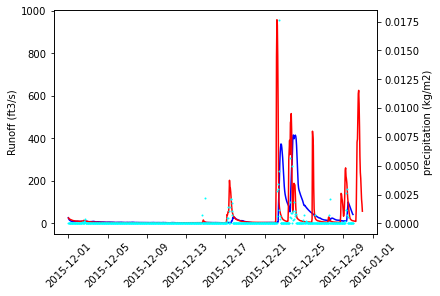

In [19]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model_lstm_nwm3_aorc.test_date_start, model_lstm_nwm3_aorc.test_date_end, freq="H")
ax.plot(xdata, model_lstm_nwm3_aorc.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax.plot(model_lstm_nwm3_aorc.obs, label='observation', c='r')
ax.set_ylabel('Runoff (ft3/s)')
plt.xticks(rotation = 45)
ax2=ax.twinx()
ax2.scatter(xdata,model_lstm_nwm3_aorc.forcings['RAINRATE'].values[-721:-24], s=1, c='cyan', label='precip')
ax2.set_ylabel('precipitation (kg/m2)')

In [20]:
model_lstm_nwm3_aorc.calc_metrics()

Nash-Suttcliffe Efficiency -0.3094241687752095
on 720 samples


In [21]:
model_lstm_nwm3_aorc.get_time_step()

'1 hour'

In [22]:
model_lstm_nwm3_aorc.get_attribute('model_name')

'LSTM for Next Generation NWM'

In [23]:
model_lstm_nwm3_aorc.get_input_var_names()

['land_surface_radiation~incoming~longwave__energy_flux',
 'land_surface_air__pressure',
 'atmosphere_air_water~vapor__relative_saturation',
 'atmosphere_water__liquid_equivalent_precipitation_rate',
 'land_surface_radiation~incoming~shortwave__energy_flux',
 'land_surface_air__temperature',
 'land_surface_wind__x_component_of_velocity',
 'land_surface_wind__y_component_of_velocity']

In [24]:
model.get_output_var_names()

['land_surface_water__runoff_volume_flux']

In [25]:
model.get_var_name('atmosphere_water__liquid_equivalent_precipitation_rate')

'total_precipitation'

In [26]:
model_lstm_nwm3_aorc.get_var_units('atmosphere_water__liquid_equivalent_precipitation_rate')

'kg m-2'

In [27]:
model_lstm_nwm3_aorc.get_var_type("land_surface_water__runoff_volume_flux")

"<class 'float'>"

In [28]:
model.get_var_units("land_surface_water__runoff_volume_flux")

'mm'

In [29]:
model_lstm_nwm3_aorc.get_var_rank("land_surface_water__runoff_volume_flux")

0

In [30]:
model_lstm_nwm3_aorc.run_unit_tests()

Unit test passed: get_output_var_names
Unit test passed: get_var_name
Unit test passed: get_var_units
Unit test passed: get_var_rank
